# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Aulaa Mustika]
- **Email:** [aulaamustika0364@student.uns.ac.id]
- **ID Dicoding:** [MC312D5X2481]

## Menentukan Pertanyaan Bisnis


- Bagaimana karakteristik pelanggan dalam berbelanja dan memberikan pendapatan bagi bisnis?
- Wilayah mana yang perlu ditingkatkan pemasaran dan diperbaiki layanan pengirimannya?
- Produk apa yang memberikan kontribusi terbesar dan terkecil terhadap pendapatan bisnis?
- Bagaimana pola permintaan pelanggan sepanjang tahun dan apakah ada tren musiman yang dapat dimanfaatkan?
- Berapa persentase masing-masing status pesanan?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## Data Wrangling

### Gathering Data

In [7]:
#Load Tabel orders
orders_df = pd.read_csv("data/orders_dataset.csv",delimiter=",")
orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#Load Tabel order_items
order_items_df = pd.read_csv("data/order_items_dataset.csv",delimiter=",")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
#Load Tabel customers
customers_df = pd.read_csv("data/customers_dataset.csv",delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
#Load Tabel products
products_df = pd.read_csv("data/products_dataset.csv",delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
#Load Tabel product_category_translation
product_category_translation_df = pd.read_csv("data/product_category_name_translation.csv",delimiter=",")
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
Terdapat 4 Tabel yang digunakan, yaitu:
- **Tabel orders** : berisi informasi mengenai pesanan dengan pelanggan, seperti order_id,	customer_id,order_status,	order_purchase_timestamp,	order_approved_at,	order_delivered_carrier_date,	order_delivered_customer_date, dan	order_estimated_delivery_date
- **Tabel order_items** : berisi detail barang yang dibeli dalam setiap pesanan, seperti order_id,	order_item_id,	product_id,	seller_id,	shipping_limit_date, dan	price	freight_value
- **Tabel customers** : berisi data pelanggan, seperti customer_id,	customer_unique_id,	customer_zip_code_prefix,	customer_city,	dan customer_state
- **Tabel products** : berisi data produk, seperti product_id,	product_category_name,	product_name_lenght,	product_description_lenght,	product_photos_qty,	product_weight_g,	product_length_cm,	product_height_cm,	dan product_width_cm
- **Tabel product_category_translation** : terjemahan kategori produk, seperti product_category_name dan	product_category_name_english



### Assessing Data

In [12]:
#Menilai Data orders_df
orders_df.info()

orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
#Memastikan missing value
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [14]:
orders_df.loc[orders_df["order_status"] == "canceled",
              ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]].isna().all()

order_approved_at                False
order_delivered_carrier_date     False
order_delivered_customer_date    False
dtype: bool

In [15]:
#mengecek Duplikasi
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
#Menilai Data order_items_df
order_items_df.info()

order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [18]:
#Menilai Data customers_df
customers_df.info()

customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
#Menilai Data products_df
products_df.info()

products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [22]:
#Menilai Data product_category_translation_df
product_category_translation_df.info()

product_category_translation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", product_category_translation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**


📌 Data `orders_df`
- ⚠ Kesalahan tipe data untuk kolom berikut (seharusnya `datetime`, bukan `object`):
  - `order_purchase_timestamp`
  - `order_approved_at`
  - `order_delivered_carrier_date`
  - `order_delivered_customer_date`
  - `order_estimated_delivery_date`
- kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` terdapat missing value, namun tidak perlu diatasi. Hal itu karena setelah dilihat ternyata tiga kolom tersebut tidak memiliki nilai saat `order_status` nya canceled (dibatalkan). Sehingga make sense jika tidak ada nilainya. Kemudian setelah dipastikan lagi, ternyata ketiga kolom mengembalikan nilai False yang berarti ada status order Canceled pada tiga kolom tersebut yang memiliki tanggal. Jadi, mungkin saja bahwa pesanan dibatalkan saat sudah payment atau kondisi lainnya.

📌 Data `order_items_df`
- ⚠ Kesalahan tipe data untuk kolom `shipping_limit_date` (seharusnya `datetime`, bukan `object`)

📌 Data `products_df`
- 🔴 inaccurate value  pada nilai minimum kolom `product_weight_g` karena tidak mungkin beratnya 0 gram.
- ❌ 610 missing value pada kolom:
  - `product_category_name`
  - `product_name_lenght`
  - `product_description_lenght`
  - `product_photos_qty`
- ❌ 2 missing value pada kolom:
  - `product_weight_g`
  - `product_length_cm`
  - `product_height_cm`
  - `product_width_cm`
- Karena kategori produknya sendiri sangat beragam jenis, sehingga jika terdapat berat, panjang, maupun tinggi produk yang kontras dengan yang lain itu mungkin saja.

### Cleaning Data

In [24]:
#Membersihkan Data orders_df

#Mengatasi Kesalahan Tipe Data
datetime_columns = ["order_purchase_timestamp", "order_approved_at",
    "order_delivered_carrier_date", "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [25]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [26]:
#Membersihkan Data order_items_df

#Mengatasi Kesalahan Tipe Data
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [27]:
#Membersihkan Data products_df

#Mengatasi Inaccurate Value
products_df[products_df['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [28]:
#Imputation dengan nilai median
median_weight = products_df.loc[products_df['product_weight_g'] > 0, 'product_weight_g'].median()
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = median_weight

products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.557468,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.000497,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [29]:
#Mengatasi Missing Value
#Data Kategorik
kategori_dominan = products_df["product_category_name"].mode()[0]
products_df["product_category_name"] = products_df["product_category_name"].fillna(kategori_dominan)

#Data Numerik
numerical_cols = [
    "product_name_lenght", "product_description_lenght", "product_photos_qty",
    "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"
]
for col in numerical_cols:
    median_value = products_df[col].median()
    products_df[col] = products_df[col].fillna(median_value)

products_df.isnull().sum()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**

📌 Data `orders_df`
- ⚠  Kesalahan tipe data = tipe sudah sesuai menjadi datetime.

📌 Data `order_items_df`
- ⚠ Kesalahan tipe data = tipe sudah sesuai menjadi datetime

📌 Data `products_df`
- 🔴 Inaccurate value = terdapat 4 produk yang sama dan memiliki berat 0 gram. Karena numerik, maka diatasi dengan imputasi dengan nilai median.
- ❌ Missing value = data kategorik diatasi dengan imputasi menggunakan kategori yang paling dominan dan untuk data numerik diatasi dengan imputasi menggunakan nilai median yang lebih tahan terhadap pencilan.


## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
#Menggabungkan Data products_df dan product_category_translation_df
products_df = pd.merge(
    left=products_df,
    right=product_category_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [31]:
#Menggabungkan Data orders_df, order_items_df, dan customers_df
orders_items_customers_df = orders_df.merge(order_items_df, on="order_id").merge(customers_df, on="customer_id")
orders_items_customers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [32]:
#Menggabungkan Data orders_items_customers_df dengan products_df
orders_items_customers_products_df = orders_items_customers_df.merge(products_df, on="product_id")
orders_items_customers_products_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,RN,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,BA,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [33]:
#Menghitung jumlah pesanan per pelanggan
order_counts_df = orders_items_customers_products_df.groupby("customer_unique_id")["order_id"].nunique()
order_counts_df

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    1
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: order_id, Length: 95420, dtype: int64

In [34]:
#Menghitung total belanja per pelanggan
total_spent_df = orders_items_customers_products_df.groupby("customer_unique_id")["price"].sum()
total_spent_df

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      18.90
0000f46a3911fa3c0805444483337064      69.00
0000f6ccb0745a6a4b88665a16c9f078      25.99
0004aac84e0df4da2b147fca70cf8255     180.00
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    1570.00
fffea47cd6d3cc0a88bd621562a9d061      64.89
ffff371b4d645b6ecea244b27531430a      89.90
ffff5962728ec6157033ef9805bacc48     115.00
ffffd2657e2aad2907e67c3e9daecbeb      56.99
Name: price, Length: 95420, dtype: float64

In [35]:
# Menentukan tanggal referensi (misalnya, tanggal terakhir dalam dataset)
reference_date = orders_df["order_purchase_timestamp"].max()

# Menghitung Recency (jumlah hari sejak pembelian terakhir)
rfm_df = orders_items_customers_products_df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (reference_date - x.max()).days,
    "order_id": "nunique",  # Frequency: jumlah pesanan unik
    "price": "sum"  # Monetary: total uang yang dihabiskan
}).reset_index()

# Ubah nama kolom
rfm_df.columns = ["customer_unique_id", "Recency", "Frequency", "Monetary"]

# Melihat distribusi pelanggan
print(rfm_df.describe())

            Recency     Frequency      Monetary
count  95420.000000  95420.000000  95420.000000
mean     287.128118      1.034018    142.440198
std      153.157768      0.211234    217.656355
min       44.000000      1.000000      0.850000
25%      163.000000      1.000000     47.900000
50%      268.000000      1.000000     89.900000
75%      396.000000      1.000000    155.000000
max      772.000000     16.000000  13440.000000


In [36]:
# Distribusi status pesanan per wilayah
status_by_state_df = orders_items_customers_df.groupby(["customer_state", "order_status"]).size().unstack(fill_value=0)
status_by_state_df

order_status,approved,canceled,delivered,invoiced,processing,shipped,unavailable
customer_state,,,,,,,
AC,0,0,91,0,0,1,0
AL,0,0,427,2,6,9,0
AM,0,0,163,0,0,2,0
AP,0,0,81,0,1,0,0
BA,0,14,3683,9,16,77,0
CE,0,4,1426,1,6,41,0
DF,0,9,2355,3,8,31,0
ES,0,8,2225,4,2,17,0
GO,0,10,2277,5,7,34,0


In [37]:
#Menghitung jumlah pesanan per bulan
orders_df["month_year"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders_df = orders_df.groupby("month_year")["order_id"].count()

monthly_orders_df

month_year
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64

In [38]:
#Total revenue per produk
product_revenue_df = orders_items_customers_products_df.groupby("product_category_name_english")["price"].sum().reset_index()
product_revenue_df

,product_category_name_english,price
0,agro_industry_and_commerce,72530.47
1,air_conditioning,55024.96
2,art,24202.64
3,arts_and_craftmanship,1814.01
4,audio,50688.50
...,...,...
66,stationery,230943.23
67,tablets_printing_image,7528.41
68,telephony,323667.53
69,toys,483946.60


**Insight:**
- Nama kategori produk sudah ada versi inggrisnya sehingga lebih mudah di mengerti dan analisis.
- Mayoritas pelanggan sudah lama tidak melakukan pembelian
- Mayoritas pelanggan hanya membeli sekali, namun tetap ada pelanggan loyal yang membeli sampai 16 kali
- Pelanggan dengan total belanja tinggi cenderung melakukan pembelian lebih dari satu kali
- Beberapa wilayah memiliki volume pesanan lebih tinggi dari yang lain
- Kategori produk tertentu mendominasi total pendapatan bisnis
- Jumlah pesanan setiap bulan sangat fluktuatif dan bervariasi


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana karakteristik pelanggan dalam berbelanja dan memberikan pendapatan bagi bisnis?


In [39]:
#Pelanggan dengan belanja tertinggi
top_customers_df = total_spent_df.sort_values(ascending=False).head(10)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10624\2926850019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers_df.values, y=top_customers_df.index, palette="coolwarm")


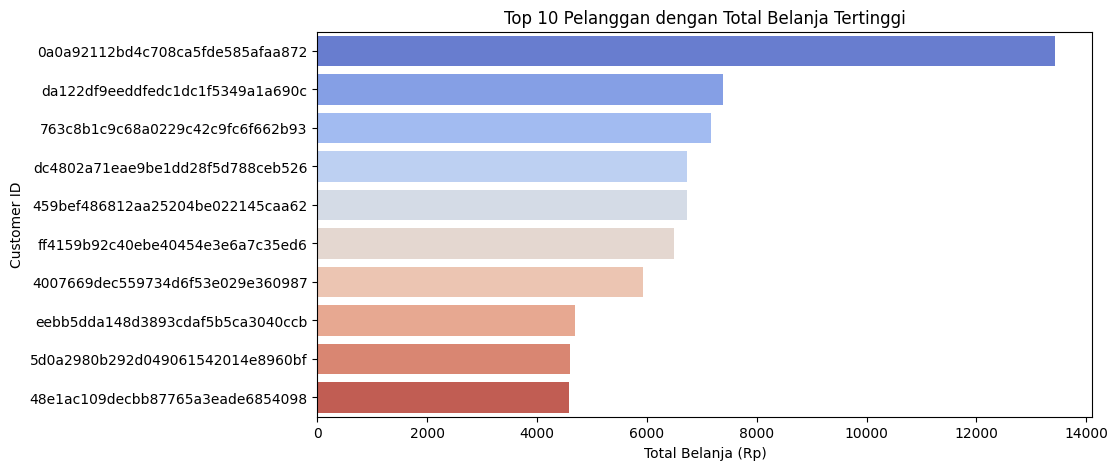

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers_df.values, y=top_customers_df.index, palette="coolwarm")
plt.xlabel("Total Belanja (Rp)")
plt.ylabel("Customer ID")
plt.title("Top 10 Pelanggan dengan Total Belanja Tertinggi")
plt.show()

### Pertanyaan 2: Wilayah mana yang perlu ditingkatkan pemasaran dan diperbaiki layanan pengirimannya?

In [41]:
orders_by_state_df = orders_items_customers_products_df[orders_items_customers_products_df["order_status"] == "canceled"].groupby("customer_state")["order_id"].count().reset_index()
orders_by_state_df = orders_by_state_df.rename(columns={"order_id": "canceled"})
orders_by_state_df = orders_by_state_df.sort_values(by="canceled", ascending=False)

orders_by_state_df

,customer_state,canceled
19,SP,293
14,RJ,69
6,MG,56
17,RS,23
13,PR,21
18,SC,15
0,BA,14
4,GO,10
2,DF,9
3,ES,8


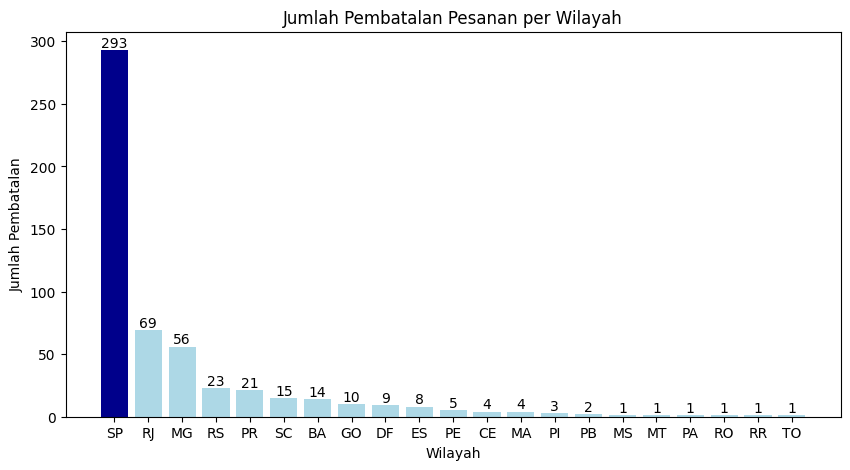

In [42]:
orders_by_state_df = orders_by_state_df.sort_values(by="canceled", ascending=False)

colors = ["lightblue"] * len(orders_by_state_df)
colors[0] = "darkblue"


plt.figure(figsize=(10, 5))
bars = plt.bar(orders_by_state_df["customer_state"], orders_by_state_df["canceled"], color=colors)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()),
             ha="center", va="bottom", fontsize=10)

plt.xlabel("Wilayah", fontsize=10)
plt.ylabel("Jumlah Pembatalan", fontsize=10)

plt.title("Jumlah Pembatalan Pesanan per Wilayah")
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 3: Produk apa yang memberikan kontribusi terbesar dan terkecil terhadap pendapatan bisnis?


In [43]:
#Produk yang memiliki kontribusi terkecil
bottom_products_df = product_revenue_df.sort_values("price", ascending=True).head(10)
print(bottom_products_df)

   product_category_name_english    price
61         security_and_services   283.29
29     fashion_childrens_clothes   569.85
11             cds_dvds_musicals   730.00
46                home_comfort_2   760.27
35                       flowers  1110.04
23           diapers_and_hygiene  1567.59
3          arts_and_craftmanship  1814.01
52                    la_cuisine  2054.99
32                 fashion_sport  2119.51
27        fashio_female_clothing  2803.64


In [44]:
#Produk yang memiliki kontribusi terbesar
top_products_df = product_revenue_df.sort_values("price", ascending=False).head(10)
print(top_products_df)

   product_category_name_english       price
43                 health_beauty  1258681.34
7                 bed_bath_table  1216523.96
70                 watches_gifts  1205005.68
65                sports_leisure   988048.97
15         computers_accessories   911954.32
39               furniture_decor   729762.49
20                    cool_stuff   635290.85
49                    housewares   632248.66
5                           auto   592720.11
42                  garden_tools   485256.46


C:\Users\ACER\AppData\Local\Temp\ipykernel_10624\147925807.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_products_df, x="product_category_name_english", y="price",


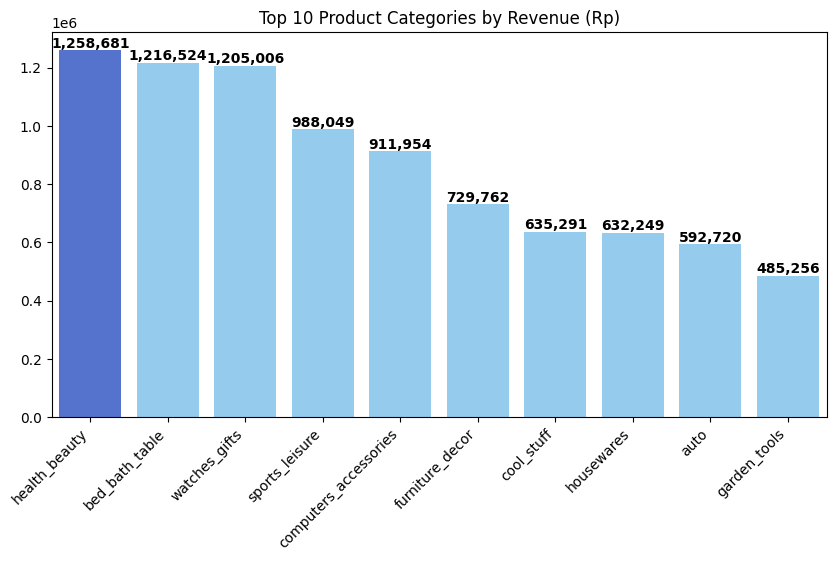

In [45]:
#Visualisasi kategori produk dengan pendapatan tertinggi
colors = ["lightskyblue"] * len(top_products_df)
top_products_df_reset = top_products_df.reset_index()
max_price_index = top_products_df_reset["price"].idxmax()
colors[max_price_index] = "royalblue"


plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_products_df, x="product_category_name_english", y="price",
                 palette=colors)

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(f"Top 10 Product Categories by Revenue (Rp)")

plt.xticks(rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("")

plt.show()

### Pertanyaan 4: Bagaimana pola permintaan pelanggan sepanjang tahun dan apakah ada tren musiman yang dapat dimanfaatkan?

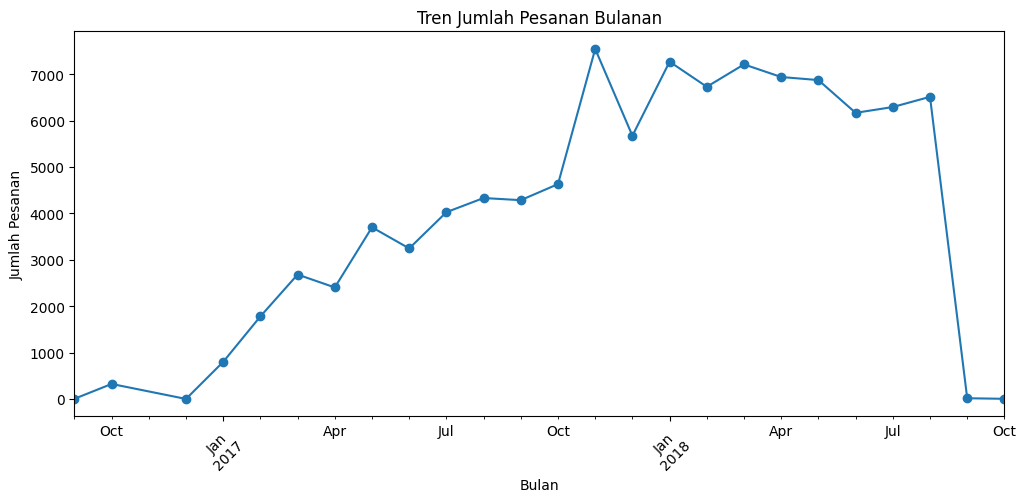

In [46]:
# Visualisasi tren pesanan bulanan
plt.figure(figsize=(12,5))
monthly_orders_df.plot(marker="o")
plt.title("Tren Jumlah Pesanan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 5: Berapa persentase masing-masing status pesanan?

In [47]:
# Menghitung jumlah masing-masing status pesanan
status_counts_df =  orders_df['order_status'].value_counts()

# Menghitung persentase masing-masing status
status_percentage_df = (status_counts_df / status_counts_df.sum()) * 100

C:\Users\ACER\AppData\Local\Temp\ipykernel_10624\2684527763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=status_percentage_df.index, y=status_percentage_df.values, palette="pastel")


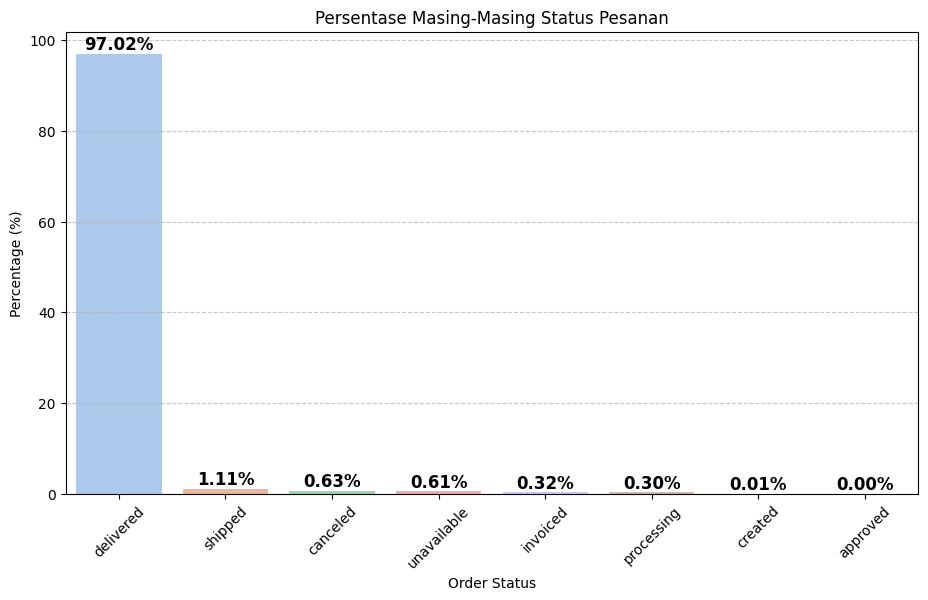

In [48]:
#Visualisasi
plt.figure(figsize=(11, 6))
ax = sns.barplot(x=status_percentage_df.index, y=status_percentage_df.values, palette="pastel")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xlabel("Order Status")
plt.ylabel("Percentage (%)")
plt.title("Persentase Masing-Masing Status Pesanan")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**

**Pertanyaan 1**
- Sebagian besar pelanggan hanya melakukan 1-2 kali transaksi, namun tetap ada pelanggan yang sering berbelanja dan memberi pendapatan besar
- Terdapat satu top pelanggan yang menyumbang pendapatan tertinggi terhadap bisnis dan memiliki selisih yang cukup jauh dengan pelanggan yang lain
- Top pelanggan memiliki total belanja yang jauh lebih tinggi jika dibandingkan dengan rata-rata.


**Pertanyaan 2**
- Wilayah SP merupakan wilayah dengan pembatalan pesanan terbanyak sehingga menjadi salah satu wilayah yang perlu diperhatikan untuk memperbaiki layanan


**Pertanyaan 3**
- Health beauty menjadi produk dengan revenue tertinggi dan diikuti oleh produk bed bath table dan watches gift, yang mana mereka bertiga memiliki selisih yang sedikit.
- Beberapa kategori produk mendominasi pendapatan, sedangkan beberapa kategori lainnya memiliki kontribusi yang sangat kecil.


**Pertanyaan 4**
- Jumlah pemesanan tiap bulannya sangat fluktuatif dan terlihat terdapat tren naik sampai sekitar awal tahun 2018.
- Jumlah pemesanan tertinggi terjadi pada bulan November 2017
- Namun, terjadi penurunan ekstrim dari bulan Juni ke Agustus 2018.


**Pertanyaan 5**
- Status pemesanan delivered mendominasi dibandingkan status yang lain. Hal tersebut artinya sebagian besar pesanan sukses

## Analisis Lanjutan (Opsional)

##ANALISIS RFM

Analisis RFM (Recency, Frequency, Monetary) adalah metode segmentasi pelanggan yang digunakan untuk memahami perilaku pembelian pelanggan berdasarkan tiga metrik utama, yaitu:
1. Recency (Jumlah hari sejak transaksi terakhir pelanggan)

Bertujuan untuk mengukur seberapa baru interaksi terakhir pelanggan dengan toko/bisnis. Semakin kecil nilainya, maka semakin aktif pelanggan tersebut.
2. Frequency (Jumlah pesanan unik yang dilakukan pelanggan)

Bertujuan untuk mengukur seberapa sering pelanggan berbelanja. Pelanggan yang memiliki frekuensi tinggi maka dia loyal.
3. Monetary(Total nilai belanja pelanggan)

Bertujuan mengukur berapa banyak uang yang sudah dihabiskan oleh pelanggan. Dengan ini, bisa mengetahui pelanggan siapa yang paling berkontribusi banyak terhadap pendapatan. 


Dengan menggunakan RFM, kita bisa membuat strategi dan solusi yang tepat sasaran dalam dunia bisnis.

## Conclusion

-  Karakteristik pelanggan dalam berbelanja dan memberikan pendapatan bagi bisnis yaitu :    

  1. Mayoritas pelanggan hanya belanja satu kali dengan nominal bervariasi
  2. Banyak pelanggan yang sudah lama tidak berbelanja
  3. Terdapat pelanggan loyal dan berkontribusi besar ke revenue
  4. Sebagian pelanggan memiliki monetary cukup rendah

  Saran dan solusi:
  1. Email marketing
  2. Diskon dan cashback untuk repeat order
  3. Strategi Loyalty program
  4. Terdapat Gratis Ongkir di atas nominal tertentu

- Perlu meningkatkan pemasaran dan memperbaiki layanan pengiriman di wilayah SP. Selain itu, wilayah dengan volume pesanan tinggi beresiko lebih besar terlambat dalam pengiriman.

  Saran dan Solusi:
  1. Bekerja sama dengan banyak penyedia layanan pengiriman di wilayah pembatalan tinggi yaitu SP
  2. Analisis lebih lanjut penyebab pembatalan pesanan


-  Produk health beauty memberikan kontribusi terbesar sedangkan  security and services memberikan kontribusi terkecil terhadap pendapatan bisnis

  Saran dan solusi:
  1. Meningkatkan stok dan strategi pemasaran pada produk dengan kontribusi pendapatan tinggi
  2. Evaluasi strategi harga dan promosi pada produk yang berkontribusi rendah

- Pola permintaan pelanggan sepanjang tahun sangat fluktuatif dan menunjukkan adanya tren.

  Saran dan solusi : Prediksi dan siapkan stok produk lebih awal dalam menghadapi lonjakan permintaan dibulan tertentu

- Status pesanan didominasi oleh delivered yang mencapai 97,02% dan sisanya yaitu 1,11% shipped, 0,63% canceled, 0,61% unavailable, 0,32% invoiced, 0,3% processing, dan 0,01% created.

  Saran dan solusi: Mengoptimalkan proses konfirmasi dan validasi pesanan untuk mengurangi pembatalan.


